**Author:** Boris Kundu

**Dataset:** cancer_classification.csv

**Problem Statement:** Predict cancer type and visualize using Tensorboard

In [150]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from datetime import datetime

In [151]:
#Read and check data
df = pd.read_csv('cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [152]:
#Check stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [153]:
#Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<AxesSubplot:>

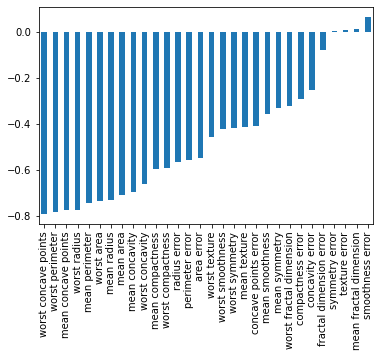

In [154]:
#Plot most corelated features to benign_0__mal_1
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

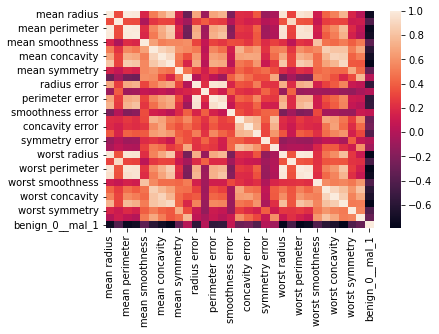

In [155]:
#Plot heatmap
sns.heatmap(df.corr())

In [156]:
#Define features and target class
X = df.drop(['benign_0__mal_1'],axis=1).values
y = df['benign_0__mal_1'].values

In [157]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [158]:
#Scale data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [159]:
#Define model
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
#Binary Classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [160]:
#Train model
model.fit(x = X_train, y = y_train, validation_data = (X_test,y_test), epochs = 300)

Epoch 1/300
14/14 [==============================] - 0s 12ms/step - loss: 0.6927 - val_loss: 0.6569
Epoch 2/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6215 - val_loss: 0.5947
Epoch 3/300
14/14 [==============================] - 0s 2ms/step - loss: 0.5708 - val_loss: 0.5478
Epoch 4/300
14/14 [==============================] - 0s 2ms/step - loss: 0.5256 - val_loss: 0.5012
Epoch 5/300
14/14 [==============================] - 0s 2ms/step - loss: 0.4823 - val_loss: 0.4535
Epoch 6/300
14/14 [==============================] - 0s 3ms/step - loss: 0.4342 - val_loss: 0.4039
Epoch 7/300
14/14 [==============================] - 0s 3ms/step - loss: 0.3905 - val_loss: 0.3612
Epoch 8/300
14/14 [==============================] - 0s 2ms/step - loss: 0.3508 - val_loss: 0.3213
Epoch 9/300
14/14 [==============================] - 0s 2ms/step - loss: 0.3172 - val_loss: 0.2890
Epoch 10/300
14/14 [==============================] - 0s 3ms/step - loss: 0.2898 - val_loss: 0.2619
Epoch 11

14/14 [==============================] - 0s 2ms/step - loss: 0.0503 - val_loss: 0.1130
Epoch 84/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0500 - val_loss: 0.1178
Epoch 85/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0518 - val_loss: 0.1114
Epoch 86/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0503 - val_loss: 0.1142
Epoch 87/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0502 - val_loss: 0.1154
Epoch 88/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.1124
Epoch 89/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0495 - val_loss: 0.1162
Epoch 90/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0494 - val_loss: 0.1128
Epoch 91/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0487 - val_loss: 0.1199
Epoch 92/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0486 - val_loss: 0.1125
Epoch 93/300


14/14 [==============================] - 0s 3ms/step - loss: 0.0287 - val_loss: 0.1562
Epoch 246/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0233 - val_loss: 0.1564
Epoch 247/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0263 - val_loss: 0.1535
Epoch 248/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0247 - val_loss: 0.1764
Epoch 249/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0273 - val_loss: 0.1516
Epoch 250/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0239 - val_loss: 0.1556
Epoch 251/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0222 - val_loss: 0.1549
Epoch 252/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0229 - val_loss: 0.1661
Epoch 253/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0269 - val_loss: 0.1797
Epoch 254/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0241 - val_loss: 0.1506
Epoc

<AxesSubplot:>

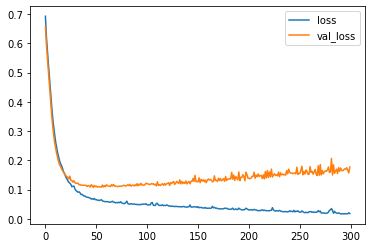

In [161]:
#Get epoch losses
losses = pd.DataFrame(model.history.history)
#Plot loss
losses.plot()

In [162]:
#Define model
model1 = Sequential()

model1.add(Dense(30,activation='relu'))
model1.add(Dense(15,activation='relu'))
#Binary Classification
model1.add(Dense(1,activation='sigmoid'))

model1.compile(loss='binary_crossentropy',optimizer='adam')

In [163]:
#Add early stop
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 25, verbose =1)

In [164]:
#Train model with early stopping this time.
model1.fit(x = X_train, y = y_train, validation_data = (X_test,y_test), 
           epochs = 300, callbacks = early_stop)

Epoch 1/300
14/14 [==============================] - 0s 14ms/step - loss: 0.6555 - val_loss: 0.6293
Epoch 2/300
14/14 [==============================] - 0s 2ms/step - loss: 0.6174 - val_loss: 0.5944
Epoch 3/300
14/14 [==============================] - 0s 3ms/step - loss: 0.5794 - val_loss: 0.5549
Epoch 4/300
14/14 [==============================] - 0s 3ms/step - loss: 0.5361 - val_loss: 0.5102
Epoch 5/300
14/14 [==============================] - 0s 3ms/step - loss: 0.4890 - val_loss: 0.4645
Epoch 6/300
14/14 [==============================] - 0s 3ms/step - loss: 0.4452 - val_loss: 0.4184
Epoch 7/300
14/14 [==============================] - 0s 3ms/step - loss: 0.4019 - val_loss: 0.3767
Epoch 8/300
14/14 [==============================] - 0s 4ms/step - loss: 0.3595 - val_loss: 0.3399
Epoch 9/300
14/14 [==============================] - 0s 3ms/step - loss: 0.3269 - val_loss: 0.3062
Epoch 10/300
14/14 [==============================] - 0s 3ms/step - loss: 0.2957 - val_loss: 0.2799
Epoch 11

<AxesSubplot:>

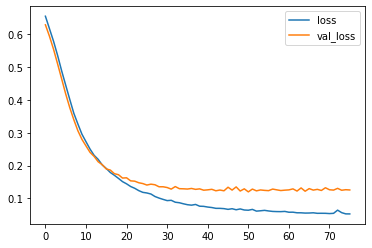

In [165]:
#Get and plot loss
losses_early = pd.DataFrame(model1.history.history)
losses_early.plot()

In [166]:
#Check current time
datetime.now().strftime("%Y-%m-%d--%H%M")

'2022-01-07--1505'

In [167]:
#Set log path
log_dir = 'logs\\fit'
#We can add timestamp for unique folder for every run
tmestamp = datetime.now().strftime("%Y-%m-%d--%H%M")
log_dir = log_dir + '\\' + tmestamp

#Define board
board = TensorBoard(log_dir = log_dir, histogram_freq = 1,
                   write_graph = True, write_images = True,
                   update_freq = 'epoch', profile_batch = 2,
                   embeddings_freq = 1)

In [168]:
#Check current directory
my_path = %pwd

In [169]:
#Define dense model with dropout
model2 = Sequential()

model2.add(Dense(30,activation='relu'))
model2.add(Dropout(0.5)) 
#50% of the 30 neurons in the above layer will be turned off randomly in every batch

model2.add(Dense(15,activation='relu'))
model2.add(Dropout(0.5))

#Binary Classification
model2.add(Dense(1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy',optimizer='adam')

In [170]:
#Train model again
model2.fit(x = X_train, y = y_train, validation_data = (X_test,y_test), 
           epochs = 300, callbacks=[early_stop,board])

Epoch 1/300
14/14 [==============================] - 2s 141ms/step - loss: 0.7040 - val_loss: 0.6794
Epoch 2/300
14/14 [==============================] - 0s 21ms/step - loss: 0.6841 - val_loss: 0.6673
Epoch 3/300
14/14 [==============================] - 0s 27ms/step - loss: 0.6728 - val_loss: 0.6517
Epoch 4/300
14/14 [==============================] - 0s 21ms/step - loss: 0.6660 - val_loss: 0.6344
Epoch 5/300
14/14 [==============================] - 0s 31ms/step - loss: 0.6295 - val_loss: 0.6103
Epoch 6/300
14/14 [==============================] - 0s 23ms/step - loss: 0.6179 - val_loss: 0.5832
Epoch 7/300
14/14 [==============================] - 0s 23ms/step - loss: 0.5893 - val_loss: 0.5594
Epoch 8/300
14/14 [==============================] - 0s 21ms/step - loss: 0.5877 - val_loss: 0.5301
Epoch 9/300
14/14 [==============================] - 0s 21ms/step - loss: 0.5445 - val_loss: 0.5001
Epoch 10/300
14/14 [==============================] - 0s 20ms/step - loss: 0.5076 - val_loss: 0.462

Epoch 80/300
14/14 [==============================] - 0s 20ms/step - loss: 0.1253 - val_loss: 0.0824
Epoch 81/300
14/14 [==============================] - 0s 24ms/step - loss: 0.1205 - val_loss: 0.0893
Epoch 82/300
14/14 [==============================] - 0s 27ms/step - loss: 0.0905 - val_loss: 0.0858
Epoch 83/300
14/14 [==============================] - 0s 23ms/step - loss: 0.1042 - val_loss: 0.0826
Epoch 84/300
14/14 [==============================] - 0s 21ms/step - loss: 0.1202 - val_loss: 0.0845
Epoch 85/300
14/14 [==============================] - 0s 24ms/step - loss: 0.1016 - val_loss: 0.0844
Epoch 86/300
14/14 [==============================] - 0s 25ms/step - loss: 0.1306 - val_loss: 0.0910
Epoch 87/300
14/14 [==============================] - 0s 23ms/step - loss: 0.1242 - val_loss: 0.0866
Epoch 88/300
14/14 [==============================] - 0s 15ms/step - loss: 0.1155 - val_loss: 0.0984
Epoch 89/300
14/14 [==============================] - 0s 25ms/step - loss: 0.1079 - val_los

<AxesSubplot:>

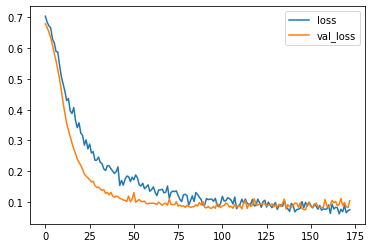

In [171]:
#Check and plot loss again
losses_early_dropout = pd.DataFrame(model2.history.history)
losses_early_dropout.plot()

In [172]:
#Get predictions on test
predictions = model2.predict_classes(X_test)

In [173]:
#Display classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [174]:
#Display confusion matrix
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]


In [175]:
#Show log directory
print(my_path+'\\'+log_dir)

C:\Users\boris\Python\Fundamentals\logs\fit\2022-01-07--1505


Tensorboard will be running locally at http://localhost:6006

In [176]:
#Go to current path using conda or command prompt and run below.
#tensorboard --logdir logs\fit\2022-01-07--1505